## <font color=blue> Problem Statement: </font>
        Address the detection of malicious URLs as a multi-class classification problem. With this project, we classify the raw URLs into different class types such as benign or safe URLs, phishing URLs, malware URLs, or defacement URLs. Overall, the goal of this project is to develop an accurate and robust system for detecting malicious URLs. By using machine learning algorithms and carefully selected features, it is possible to achieve high levels of accuracy and effectively protect users from potential security threats.

Phishing is a type of fraud in which an attacker impersonates a reputable company or person in order to get sensitive information such as login credentials or account information via email or other communication channels. Phishing is popular among attackers because it is easier to persuade someone to click a malicious link that appears to be authentic than it is to break through a computer's protection measures.


# **Context**
Malicious URLs or malicious website is a very serious threat to cybersecurity. Malicious URLs host unsolicited content (spam, phishing, drive-by downloads, etc.) and lure unsuspecting users to become victims of scams (monetary loss, theft of private information, and malware installation), and cause losses of billions of dollars every year. We have collected this dataset to include a large number of examples of Malicious URLs so that a machine learning-based model can be developed to identify malicious urls so that we can stop them in advance before infecting computer system or spreading through inteinternet.

# **Content**
we have collected a huge dataset of 651,191 URLs, out of which 428103 benign or safe URLs, 96457 defacement URLs, 94111 phishing URLs, and 32520 malware URLs. Figure 2 depicts their distribution in terms of percentage. As we know one of the most crucial tasks is to curate the dataset for a machine learning project. We have curated this dataset from five different sources.

For collecting benign, phishing, malware and defacement URLs we have used [URL dataset (ISCX-URL-2016)](https://www.unb.ca/cic/datasets/url-2016.html) For increasing phishing and malware URLs, we have used [Malware domain black list dataset](http://www.malwaredomains.com/wordpress/?page_id=66). We have increased benign URLs using [faizan git repo](https://github.com/faizann24/Using-machine-learning-to-detect-malicious-URLs/tree/master/data) At last, we have increased more number of phishing URLs using [Phishtank dataset](https://www.phishtank.com/developer_info.php) and [PhishStorm dataset](https://research.aalto.fi/en/datasets/phishstorm--phishing--legitimate-url-dataset(f49465b2-c68a-4182-9171-075f0ed797d5).html) As we have told you that dataset is collected from different sources. So firstly, we have collected the URLs from different sources into a separate data frame and finally merge them to retain only URLs and their class type.

A URL consists of the top-level domain, hostname, paths, and port of the web
address, as in the following diagram:

<img src="URL1.png" width= "3000">

# Quick Links

1. [Libraries](#section-1)
2. [Preprocessing](#section-2)
3. [Feature Engineering](#section-3)
4. [EDA](#4)
5. [Target Encoding](#section-5)
6. [Creation of Dataframe (Features and Target)](#section-6)
7. [Scaling of Data](#section-7)
8. [Analysis after scaling Data](#section-8)
9. [Correlation and heatmap](#section-9)
10. [p_value and variance inflation factor](#section-10)
11. [Train Test Split](#section-11)
12. [Data Balancing](#section-12)
13. [Model Building & Hyperparameter tuning](#section-13)
14. [ANN Model](#section-14)
15. [Creating Best Model](#section-15)
16. [Saving Model Using pickel & joblib](#section-16)
17. [confusion_matrix](#section-17)
18. [ROC Curve](#section-18)
19. [Classification Report](#section-19)
20. [Prediction](#section-20)

# **<a id="section-1"></a><font color='3D87A6'> Libraries </font>**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import itertools
from sklearn.model_selection import train_test_split
import xgboost as xgb
from lightgbm import LGBMClassifier
import os
from wordcloud import WordCloud
pd.set_option("display.max_columns",None)
pd.set_option("max_colwidth",None)
pd.set_option("display.max_rows",None)
filterwarnings("ignore")

# **<a id="section-2"></a><font color='3D87A6'> Preprocessing </font>**

In [6]:
data = pd.read_csv("/content/malicious_phish.csv")
#df = data.copy()
df = data[:100000]
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=com_content&view=article&id=70&vsig70_0=15,defacement
4,http://adventure-nicaragua.net/index.php?option=com_mailto&tmpl=component&link=aHR0cDovL2FkdmVudHVyZS1uaWNhcmFndWEubmV0L2luZGV4LnBocD9vcHRpb249Y29tX2NvbnRlbnQmdmlldz1hcnRpY2xlJmlkPTQ3OmFib3V0JmNhdGlkPTM2OmRlbW8tYXJ0aWNsZXMmSXRlbWlkPTU0,defacement


In [7]:
df.shape

(100000, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     100000 non-null  object
 1   type    100000 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [9]:
df.describe()

,url,type
count,100000,100000
unique,98826,4
top,http://style.org.hc360.com/css/detail/mysite/siteconfig/pro_control.css,benign
freq,33,73260


In [10]:
df.dtypes

url     object
type    object
dtype: object

## checking null values from our dataset

In [11]:
df.isna().sum().sum()

0

### There is no null value present in our data

In [12]:
df.type.value_counts()

benign        73260
defacement    18350
phishing       5962
malware        2428
Name: type, dtype: int64

In [13]:
df_phish = df[df.type=='phishing']
df_malware = df[df.type=='malware']
df_deface = df[df.type=='defacement']
df_benign = df[df.type=='benign']

In [14]:
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=com_content&view=article&id=70&vsig70_0=15,defacement
4,http://adventure-nicaragua.net/index.php?option=com_mailto&tmpl=component&link=aHR0cDovL2FkdmVudHVyZS1uaWNhcmFndWEubmV0L2luZGV4LnBocD9vcHRpb249Y29tX2NvbnRlbnQmdmlldz1hcnRpY2xlJmlkPTQ3OmFib3V0JmNhdGlkPTM2OmRlbW8tYXJ0aWNsZXMmSXRlbWlkPTU0,defacement


### Phishing URL

**Phishing** is a type of social engineering attack often used to steal user data, including login credentials and credit card numbers. It occurs when an attacker, masquerading as a trusted entity, dupes a victim into opening an email, instant message, or text message

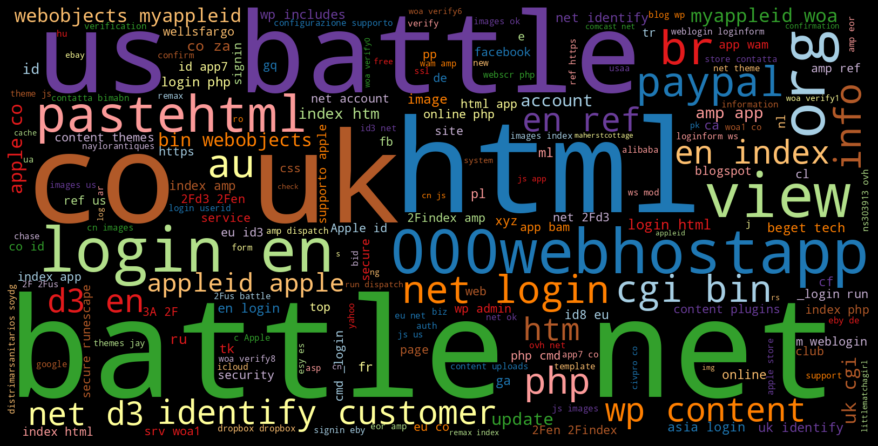

In [15]:
phish_url = " ".join(i for i in df_phish.url)
wordcloud = WordCloud(width=1600, height=800,colormap='Paired').generate(phish_url)
plt.figure( figsize=(12,14),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Malware URL

**Malware** (short for “malicious software”) is a file or code, typically delivered over a network, that infects, explores, steals or conducts virtually any behavior an attacker wants. And because malware comes in so many variants, there are numerous methods to infect computer systems.

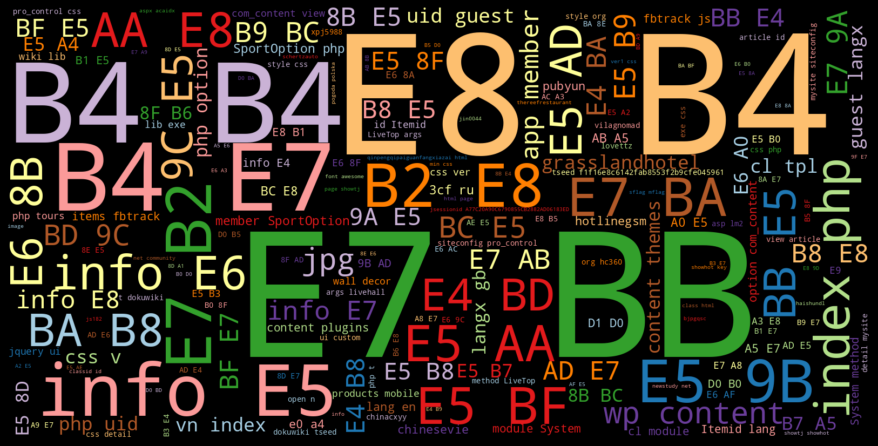

In [16]:
malware_url = " ".join(i for i in df_malware.url)
wordcloud = WordCloud(width=1600, height=800,colormap='Paired').generate(malware_url)
plt.figure( figsize=(12,14),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Defacement URL

Website **defacements** are the unauthorized modification of web pages, including the addition, removal, or alteration of existing content. These attacks are commonly carried out by hacktivists, who compromise a website or web server and replace or alter the hosted website information with their own messages.

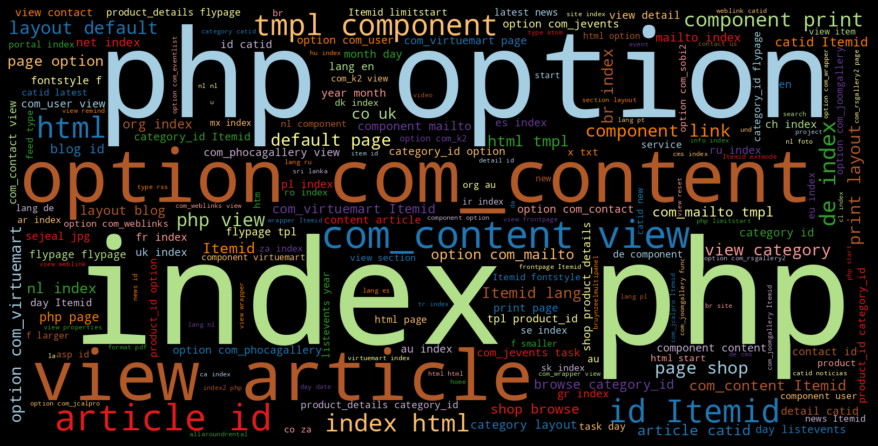

In [17]:
deface_url = " ".join(i for i in df_deface.url)
wordcloud = WordCloud(width=1600, height=800,colormap='Paired').generate(deface_url)
plt.figure( figsize=(12,14),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Benign URL

A benign website or URL refers to a website or URL that is considered safe, trustworthy, and does not pose any harm to the user's device or data. Typically, a benign website or URL is not associated with any malicious or harmful activities, such as malware infections, phishing scams, or cyber attacks.

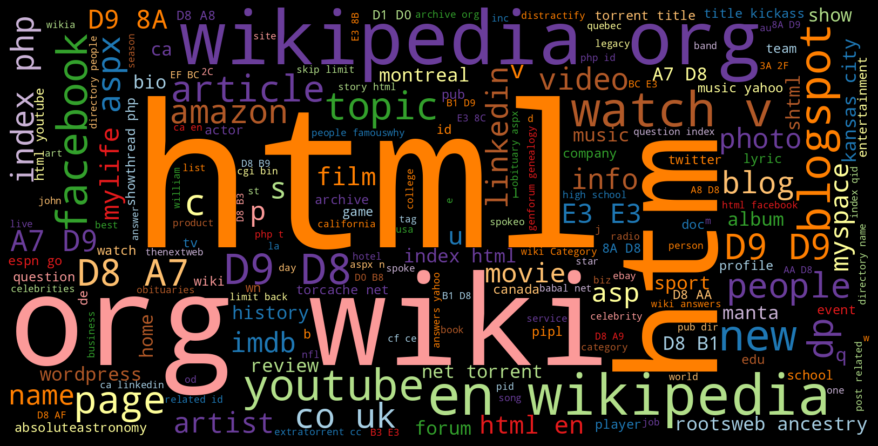

In [18]:
benign_url = " ".join(i for i in df_benign.url)
wordcloud = WordCloud(width=1600, height=800,colormap='Paired').generate(benign_url)
plt.figure( figsize=(12,14),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [19]:
count = df.type.value_counts()
count

benign        73260
defacement    18350
phishing       5962
malware        2428
Name: type, dtype: int64

In [20]:
x=count.index
x

Index(['benign', 'defacement', 'phishing', 'malware'], dtype='object')

Text(0, 0.5, 'Count')

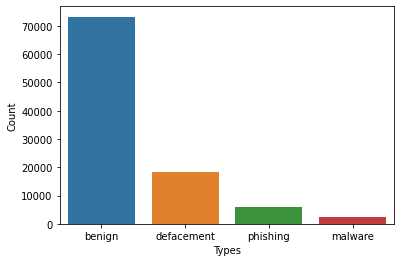

In [21]:
sns.barplot(x=count.index, y=count)
plt.xlabel('Types')
plt.ylabel('Count')

<h4>first have to omit the (www.) from the URL which is in fact a sub domain in itself.</h4>

# **<a id="section-3"></a><font color='3D87A6'> Feature Engineering</font>**

In [22]:
import re
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))

In [23]:
from urllib.parse import urlparse

def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0


df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

In [24]:
from googlesearch import search

In [25]:
def google_index(url):
    site = search(url, 5)
    return 1 if site else 0
df['google_index'] = df['url'].apply(lambda i: google_index(i))

In [26]:
def count_dot(url):
    count_dot = url.count('.')
    return count_dot

df['count.'] = df['url'].apply(lambda i: count_dot(i))
df.head()

,url,type,use_of_ip,abnormal_url,google_index,count.
0,br-icloud.com.br,phishing,0,0,1,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,2
3,http://www.garage-pirenne.be/index.php?option=com_content&view=article&id=70&vsig70_0=15,defacement,0,1,1,3
4,http://adventure-nicaragua.net/index.php?option=com_mailto&tmpl=component&link=aHR0cDovL2FkdmVudHVyZS1uaWNhcmFndWEubmV0L2luZGV4LnBocD9vcHRpb249Y29tX2NvbnRlbnQmdmlldz1hcnRpY2xlJmlkPTQ3OmFib3V0JmNhdGlkPTM2OmRlbW8tYXJ0aWNsZXMmSXRlbWlkPTU0,defacement,0,1,1,2


In [27]:
def count_www(url):
    url.count('www')
    return url.count('www')

df['count-www'] = df['url'].apply(lambda i: count_www(i))

In [28]:
def count_atrate(url):
     
    return url.count('@')

df['count@'] = df['url'].apply(lambda i: count_atrate(i))

In [29]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))

In [30]:
def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

df['count_embed_domian'] = df['url'].apply(lambda i: no_of_embed(i))

In [31]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
    
    
df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

In [32]:
def count_https(url):
    return url.count('https')

df['count-https'] = df['url'].apply(lambda i : count_https(i))

In [33]:
def count_http(url):
    return url.count('http')

df['count-http'] = df['url'].apply(lambda i : count_http(i))

In [34]:
def count_per(url):
    return url.count('%')

df['count%'] = df['url'].apply(lambda i : count_per(i))

In [35]:
def count_ques(url):
    return url.count('?')

df['count?'] = df['url'].apply(lambda i: count_ques(i))

In [36]:
def count_hyphen(url):
    return url.count('-')

df['count-'] = df['url'].apply(lambda i: count_hyphen(i))

In [37]:
def count_equal(url):
    return url.count('=')

df['count='] = df['url'].apply(lambda i: count_equal(i))

In [38]:
def url_length(url):
    return len(str(url))


#Length of URL
df['url_length'] = df['url'].apply(lambda i: url_length(i))

In [39]:
#Hostname Length
def hostname_length(url):
    return len(urlparse(url).netloc)

df['hostname_length'] = df['url'].apply(lambda i: hostname_length(i))

df.head()

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,count%,count?,count-,count=,url_length,hostname_length
0,br-icloud.com.br,phishing,0,0,1,2,0,0,0,0,0,0,0,0,0,1,0,16,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,2,0,0,2,0,0,0,0,0,0,0,0,35,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,2,0,0,3,0,0,0,0,0,0,0,0,31,0
3,http://www.garage-pirenne.be/index.php?option=com_content&view=article&id=70&vsig70_0=15,defacement,0,1,1,3,1,0,1,0,0,0,1,0,1,1,4,88,21
4,http://adventure-nicaragua.net/index.php?option=com_mailto&tmpl=component&link=aHR0cDovL2FkdmVudHVyZS1uaWNhcmFndWEubmV0L2luZGV4LnBocD9vcHRpb249Y29tX2NvbnRlbnQmdmlldz1hcnRpY2xlJmlkPTQ3OmFib3V0JmNhdGlkPTM2OmRlbW8tYXJ0aWNsZXMmSXRlbWlkPTU0,defacement,0,1,1,2,0,0,1,0,0,0,1,0,1,1,3,235,23


In [40]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))

In [41]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits


df['count-digits']= df['url'].apply(lambda i: digit_count(i))

In [42]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters


df['count-letters']= df['url'].apply(lambda i: letter_count(i))

df.head()

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,count%,count?,count-,count=,url_length,hostname_length,sus_url,count-digits,count-letters
0,br-icloud.com.br,phishing,0,0,1,2,0,0,0,0,0,0,0,0,0,1,0,16,0,0,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,2,0,0,2,0,0,0,0,0,0,0,0,35,0,0,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,2,0,0,3,0,0,0,0,0,0,0,0,31,0,0,1,25
3,http://www.garage-pirenne.be/index.php?option=com_content&view=article&id=70&vsig70_0=15,defacement,0,1,1,3,1,0,1,0,0,0,1,0,1,1,4,88,21,0,7,63
4,http://adventure-nicaragua.net/index.php?option=com_mailto&tmpl=component&link=aHR0cDovL2FkdmVudHVyZS1uaWNhcmFndWEubmV0L2luZGV4LnBocD9vcHRpb249Y29tX2NvbnRlbnQmdmlldz1hcnRpY2xlJmlkPTQ3OmFib3V0JmNhdGlkPTM2OmRlbW8tYXJ0aWNsZXMmSXRlbWlkPTU0,defacement,0,1,1,2,0,0,1,0,0,0,1,0,1,1,3,235,23,0,22,199


In [43]:
pip install tld

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 KB 6.0 MB/s eta 0:00:00


In [44]:
#Importing dependencies
from urllib.parse import urlparse
from tld import get_tld
import os.path

#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

#Length of Top Level Domain
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))

In [45]:
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))

In [46]:
df = df.drop("tld",1)

In [47]:
df.columns

Index(['url', 'type', 'use_of_ip', 'abnormal_url', 'google_index', 'count.',
       'count-www', 'count@', 'count_dir', 'count_embed_domian', 'short_url',
       'count-https', 'count-http', 'count%', 'count?', 'count-', 'count=',
       'url_length', 'hostname_length', 'sus_url', 'count-digits',
       'count-letters', 'fd_length', 'tld_length'],
      dtype='object')

In [48]:
df['type'].value_counts()

benign        73260
defacement    18350
phishing       5962
malware        2428
Name: type, dtype: int64

# **<a id="4"></a><font color='3D87A6'> EDA</font>**

## 1. Distribution of use_of_ip

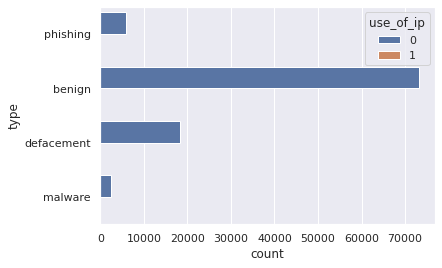

In [49]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(y="type", data=df,hue="use_of_ip")


## 2. Distribution of abnormal url

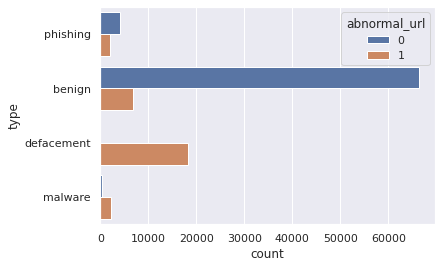

In [50]:
sns.set(style="darkgrid")
ax = sns.countplot(y="type", data=df,hue="abnormal_url")


## 3. Distribution of Google Index

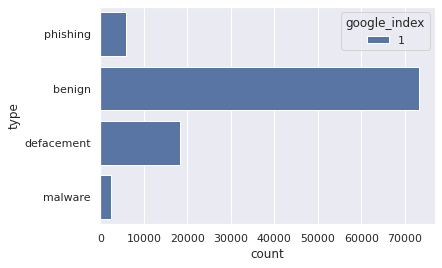

In [51]:
sns.set(style="darkgrid")
ax = sns.countplot(y="type", data=df,hue="google_index")

## 4. Distribution of Shorl URL

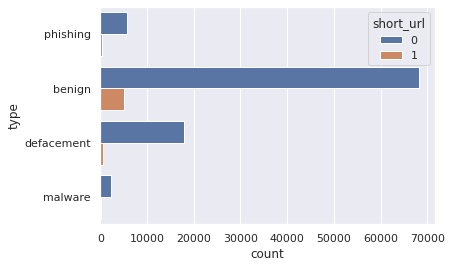

In [52]:
sns.set(style="darkgrid")
ax = sns.countplot(y="type", data=df,hue="short_url")

## 5. Distribution of Suspicious URL

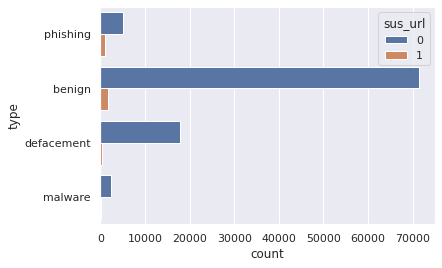

In [53]:
sns.set(style="darkgrid")
ax = sns.countplot(y="type", data=df,hue="sus_url")

## 6. Distribution of count of [.] dot

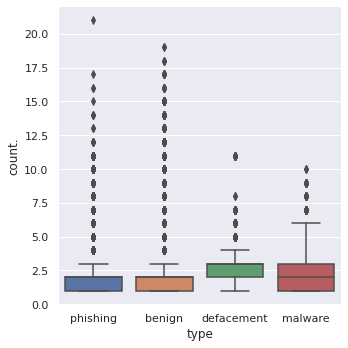

In [54]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count.", kind="box", data=df)

## 7. Distribution of count-www

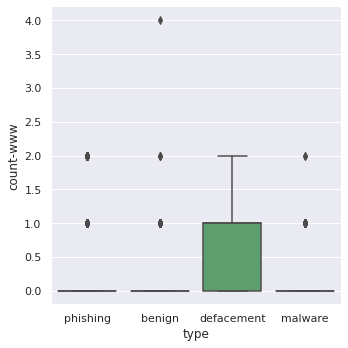

In [55]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count-www", kind="box", data=df)

## 8. Distribution of count@

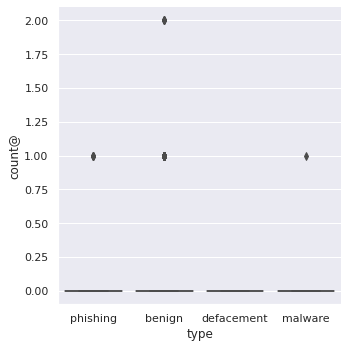

In [56]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count@", kind="box", data=df)

## 9. Distribution of count_dir

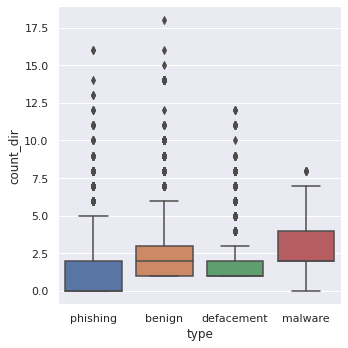

In [57]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count_dir", kind="box", data=df)

## 10. Distribution of hostname length

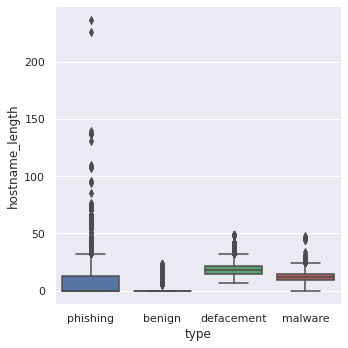

In [58]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="hostname_length", kind="box", data=df)

## 11. Distribution of first directory length

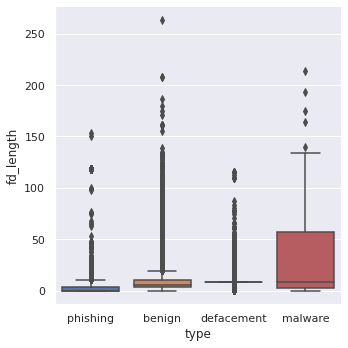

In [59]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="fd_length", kind="box", data=df)

## 12. Distribution of top-level domain length

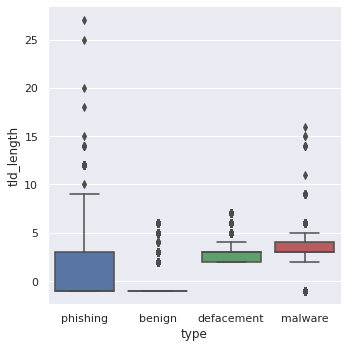

In [60]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="tld_length", kind="box", data=df)

# **<a id="section-5"></a><font color='3D87A6'> Target Encoding</font>**

In [61]:
df["type_code"]= df['type'].apply(lambda i: 1 if i == "benign" else 0)

In [62]:
df.type_code.unique()

array([0, 1])

# **<a id="section-6"></a><font color='3D87A6'> Creation of Dataframe (Features and Target) </font>**

In [63]:
df = df[['use_of_ip','abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
       'count-letters','type_code']]

In [64]:
df.head()

,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,count%,count?,count-,count=,url_length,hostname_length,sus_url,fd_length,tld_length,count-digits,count-letters,type_code
0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,16,0,0,0,-1,0,13,0
1,0,0,2,0,0,2,0,0,0,0,0,0,0,0,35,0,0,5,-1,1,29,1
2,0,0,2,0,0,3,0,0,0,0,0,0,0,0,31,0,0,7,-1,1,25,1
3,0,1,3,1,0,1,0,0,0,1,0,1,1,4,88,21,0,9,2,7,63,0
4,0,1,2,0,0,1,0,0,0,1,0,1,1,3,235,23,0,9,3,22,199,0


# **<a id="section-7"></a><font color='3D87A6'> Scaling of Data </font>**

In [65]:
#Predictor Variables
# filtering out google_index as it has only 1 value
x = df.drop("type_code",axis=1)
#Target Variable
y = df['type_code']

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(x)
x = pd.DataFrame(scaled_data,columns = x.columns)
x.head()

,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,count%,count?,count-,count=,url_length,hostname_length,sus_url,fd_length,tld_length,count-digits,count-letters
0,0.0,0.0,0.05,0.00,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000,0.021277,0.000000,0.006618,0.000000,0.0,0.000000,0.000000,0.000000,0.017516
1,0.0,0.0,0.05,0.00,0.0,0.111111,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.019193,0.000000,0.0,0.019011,0.000000,0.000949,0.042994
2,0.0,0.0,0.05,0.00,0.0,0.166667,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.016545,0.000000,0.0,0.026616,0.000000,0.000949,0.036624
3,0.0,1.0,0.10,0.25,0.0,0.055556,0.0,0.0,0.0,0.25,0.0,0.071429,0.021277,0.181818,0.054269,0.088983,0.0,0.034221,0.107143,0.006641,0.097134
4,0.0,1.0,0.05,0.00,0.0,0.055556,0.0,0.0,0.0,0.25,0.0,0.071429,0.021277,0.136364,0.151555,0.097458,0.0,0.034221,0.142857,0.020873,0.313694


In [68]:
df = pd.concat([x,y],axis=1)
df.head()

,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,count%,count?,count-,count=,url_length,hostname_length,sus_url,fd_length,tld_length,count-digits,count-letters,type_code
0,0.0,0.0,0.05,0.00,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000,0.021277,0.000000,0.006618,0.000000,0.0,0.000000,0.000000,0.000000,0.017516,0
1,0.0,0.0,0.05,0.00,0.0,0.111111,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.019193,0.000000,0.0,0.019011,0.000000,0.000949,0.042994,1
2,0.0,0.0,0.05,0.00,0.0,0.166667,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.016545,0.000000,0.0,0.026616,0.000000,0.000949,0.036624,1
3,0.0,1.0,0.10,0.25,0.0,0.055556,0.0,0.0,0.0,0.25,0.0,0.071429,0.021277,0.181818,0.054269,0.088983,0.0,0.034221,0.107143,0.006641,0.097134,0
4,0.0,1.0,0.05,0.00,0.0,0.055556,0.0,0.0,0.0,0.25,0.0,0.071429,0.021277,0.136364,0.151555,0.097458,0.0,0.034221,0.142857,0.020873,0.313694,0


# **<a id="section-8"></a><font color='3D87A6'> Analysis after scaling </font>**

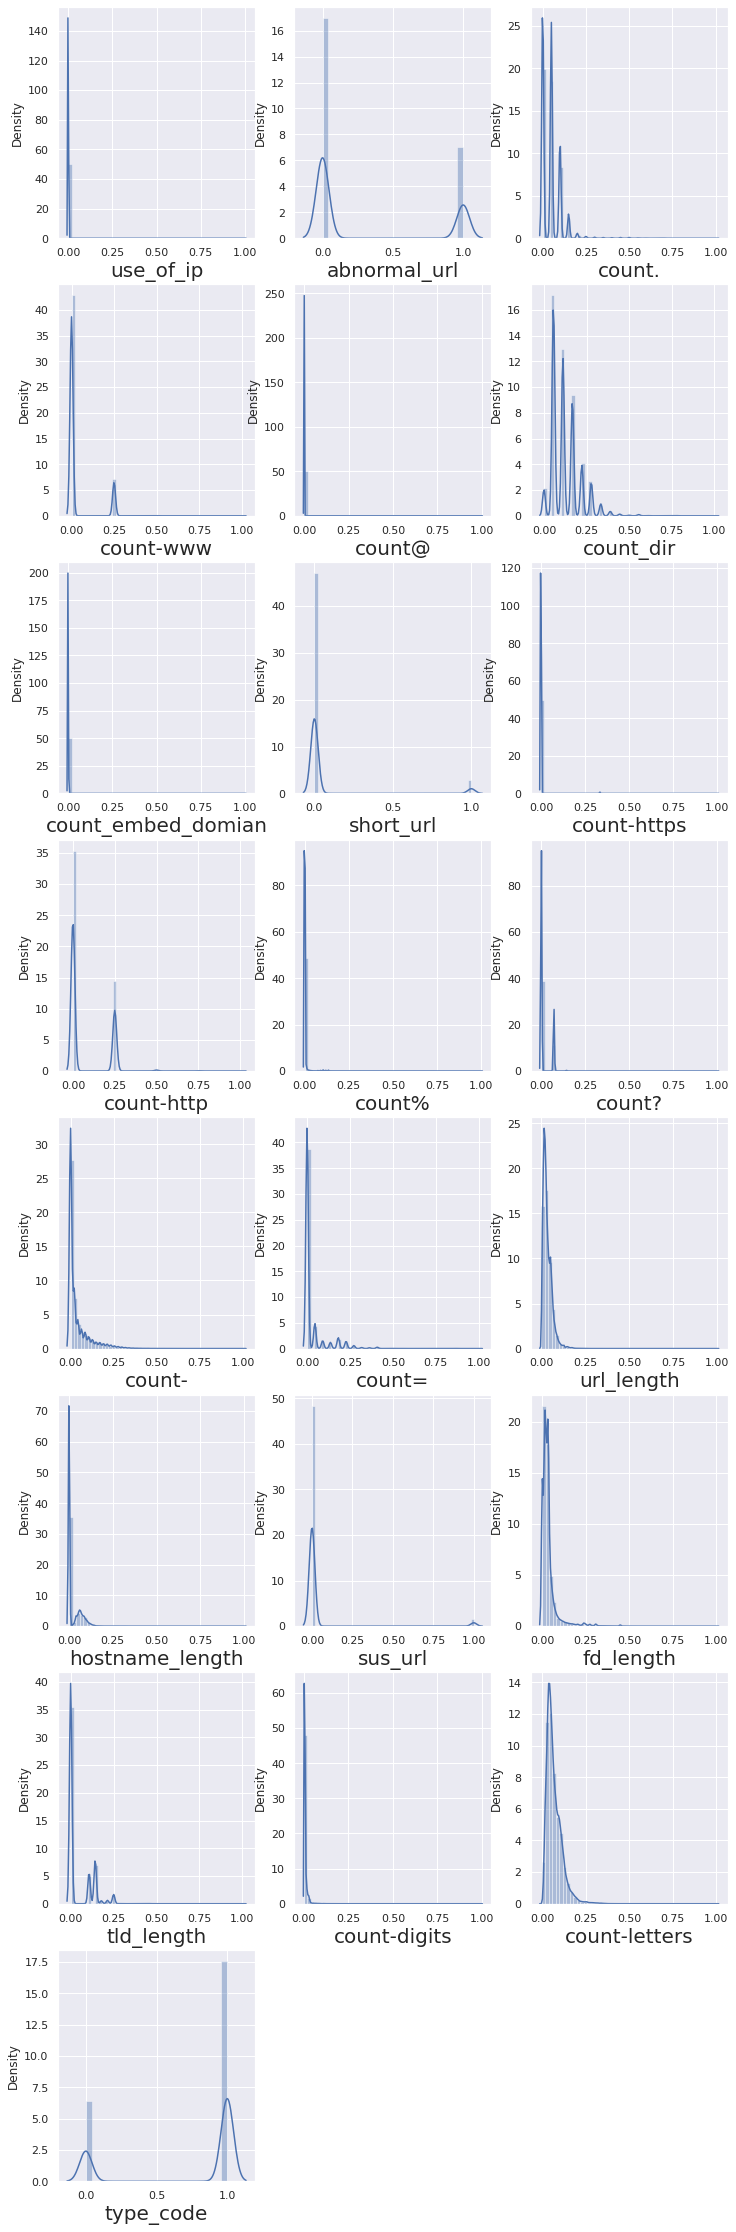

In [69]:
# Analysing the distribution of data.
plt.figure(figsize=(12,40),facecolor='white')
plotnumber = 1
sns.set()
for column in df:
    if plotnumber <= 22:
        ax = plt.subplot(8,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber += 1
plt.show()

# **<a id="section-9"></a><font color='3D87A6'> Correlation and heatmap </font>**

In [70]:
corr = df.corr().apply(lambda x: round(x,2))
z = corr.style.highlight_between(left=-1,right=-0.90,color='red').highlight_between(left=0.90,right=1,color='red')
z

,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,count%,count?,count-,count=,url_length,hostname_length,sus_url,fd_length,tld_length,count-digits,count-letters,type_code
use_of_ip,1.000000,0.020000,0.080000,0.000000,-0.000000,0.020000,-0.000000,-0.010000,0.010000,0.020000,-0.000000,-0.000000,-0.010000,-0.000000,0.010000,0.010000,0.020000,0.000000,-0.010000,0.030000,0.000000,-0.020000
abnormal_url,0.020000,1.000000,0.390000,0.630000,0.020000,0.070000,0.030000,-0.050000,0.100000,0.980000,0.170000,0.360000,0.180000,0.440000,0.550000,0.880000,0.070000,0.150000,0.940000,0.250000,0.520000,-0.730000
count.,0.080000,0.390000,1.000000,0.450000,-0.010000,-0.020000,0.020000,0.020000,0.020000,0.400000,-0.050000,0.320000,-0.080000,0.310000,0.370000,0.490000,0.120000,0.080000,0.410000,0.150000,0.380000,-0.370000
count-www,0.000000,0.630000,0.450000,1.000000,-0.010000,-0.060000,0.010000,-0.060000,0.000000,0.620000,-0.040000,0.320000,-0.020000,0.390000,0.290000,0.690000,0.040000,0.020000,0.580000,0.010000,0.330000,-0.670000
count@,-0.000000,0.020000,-0.010000,-0.010000,1.000000,0.020000,-0.000000,-0.010000,0.180000,0.020000,-0.000000,0.020000,0.040000,-0.000000,0.030000,0.010000,-0.000000,0.000000,0.030000,0.030000,0.020000,0.010000
count_dir,0.020000,0.070000,-0.020000,-0.060000,0.020000,1.000000,0.060000,0.020000,0.020000,0.070000,0.030000,-0.210000,0.290000,-0.210000,0.290000,0.020000,0.020000,-0.070000,0.070000,0.200000,0.270000,0.210000
count_embed_domian,-0.000000,0.030000,0.020000,0.010000,-0.000000,0.060000,1.000000,0.010000,-0.000000,0.040000,0.000000,0.000000,-0.010000,-0.000000,0.020000,0.030000,-0.000000,-0.010000,0.020000,0.000000,0.020000,-0.010000
short_url,-0.010000,-0.050000,0.020000,-0.060000,-0.010000,0.020000,0.010000,1.000000,0.030000,-0.050000,-0.030000,-0.050000,0.050000,-0.040000,0.000000,-0.050000,-0.010000,-0.050000,-0.030000,-0.020000,0.020000,0.070000
count-https,0.010000,0.100000,0.020000,0.000000,0.180000,0.020000,-0.000000,0.030000,1.000000,0.150000,0.090000,0.070000,0.060000,0.020000,0.120000,0.060000,0.050000,-0.010000,0.100000,0.110000,0.100000,0.010000
count-http,0.020000,0.980000,0.400000,0.620000,0.020000,0.070000,0.040000,-0.050000,0.150000,1.000000,0.210000,0.380000,0.170000,0.440000,0.570000,0.860000,0.090000,0.140000,0.920000,0.270000,0.530000,-0.700000


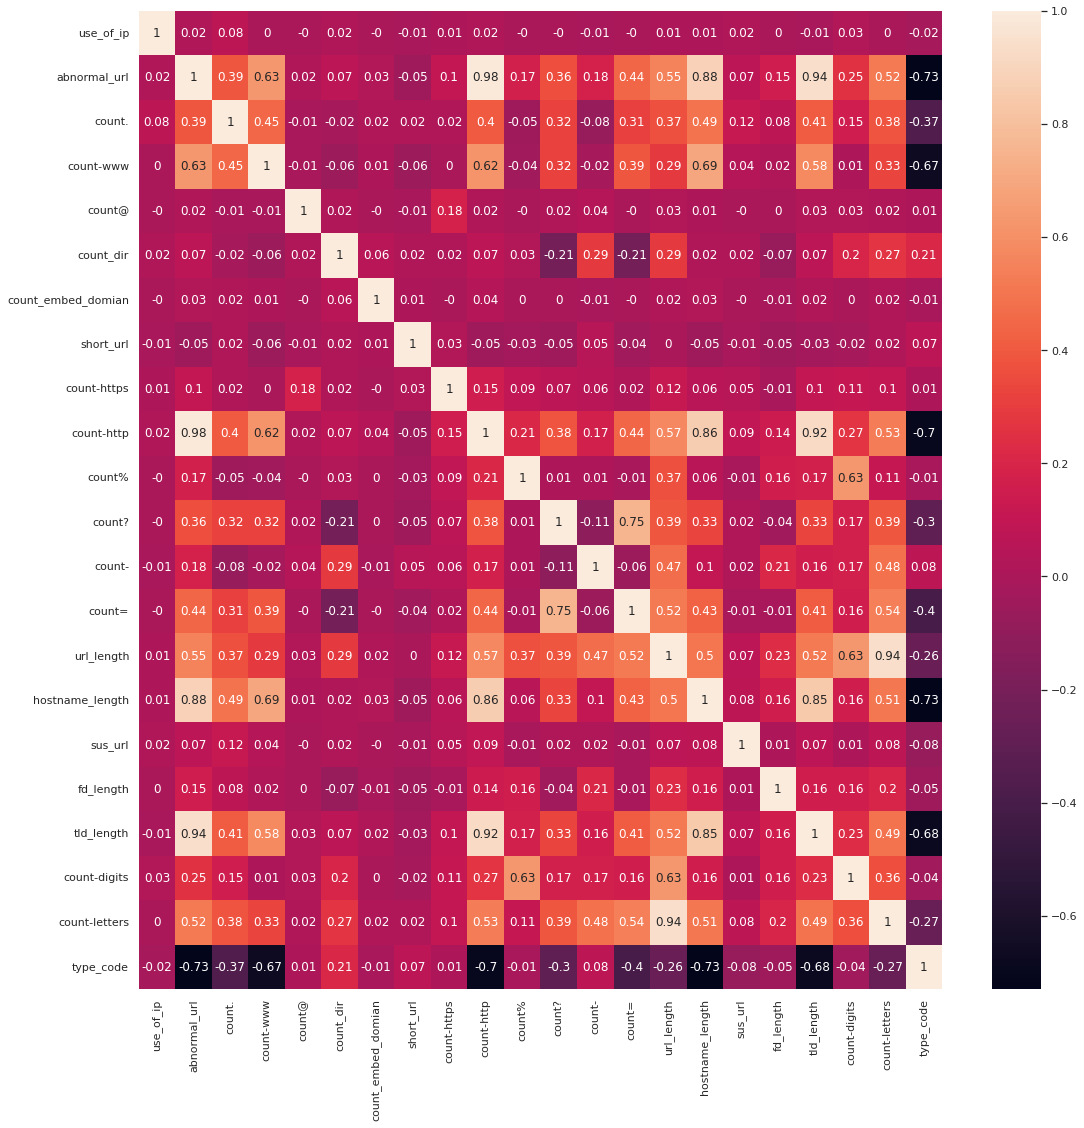

In [71]:
plt.figure(figsize=(18,18))
sns.heatmap(corr,annot = True)
plt.show()

# **<a id="section-10"></a><font color='3D87A6'> p_value and variance inflation factor </font>**
### checking 'P>|t|' > 0.05 and vif > 5

In [72]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
sm_data = sm.add_constant(x)

In [73]:
sm_data.shape

(100000, 22)

In [74]:
lr = sm.Logit(y,sm_data).fit()

Optimization terminated successfully.
         Current function value: 0.134902
         Iterations 12


In [75]:
lr.pvalues

const                  2.562946e-31
use_of_ip              1.321179e-17
abnormal_url           1.994480e-97
count.                 4.957863e-38
count-www              0.000000e+00
count@                 5.737340e-01
count_dir              0.000000e+00
count_embed_domian     2.658390e-05
short_url              4.991128e-16
count-https            3.092955e-51
count-http             3.503263e-01
count%                1.871763e-100
count?                2.676828e-161
count-                 1.053011e-07
count=                 1.038080e-89
url_length            5.658848e-140
hostname_length       1.094755e-297
sus_url                1.562609e-52
fd_length             3.178184e-148
tld_length             4.476286e-01
count-digits          7.989829e-128
count-letters         6.605211e-122
dtype: float64

In [76]:
df.shape

(100000, 22)

#### creating the function to create dataframe to show vif and p_value at a time to comapare both wrt that feature(column)

In [77]:
def df_of_vif_pvalue():
    p_value_df = pd.DataFrame(lr.pvalues.apply(lambda x: round(x,6))).reset_index()
    p_value_df.columns=["feature_names",'p_values']
    def VIF(sm_data):
        vif_df = pd.DataFrame()
        vif_df["feature_names"] = sm_data.columns
        vif_df["vif"] = [variance_inflation_factor(sm_data.values,i) for i in range(sm_data.shape[1])]
        vif_df["vif"] = round(vif_df["vif"],2)
        vif_df = vif_df.sort_values(by = "vif",ascending = False)
        return vif_df
    global vif_pvalue_df
    vif_pvalue_df = pd.merge(p_value_df,VIF(sm_data), on = "feature_names")
    return vif_pvalue_df

## creating the function to check high vif and p_value both

In [78]:
def High_vif_pvalue(vif_pvalue_df):
    global lst_feature_to_del
    lst_feature_to_del = []
    '''vif_pvalue is a DataFrame having pvalues and vif'''
    for i in range(len(vif_pvalue_df)):
        if vif_pvalue_df["vif"][i] > 5 and vif_pvalue_df["p_values"][i] >0.05:
            lst_feature_to_del.append(vif_pvalue_df["feature_names"][i])
    return lst_feature_to_del

In [79]:
df_of_vif_pvalue()

,feature_names,p_values,vif
0,const,0.000000,11.20
1,use_of_ip,0.000000,1.02
2,abnormal_url,0.000000,46.81
3,count.,0.000000,2.34
4,count-www,0.000000,2.15
5,count@,0.573734,1.04
6,count_dir,0.000000,2.47
7,count_embed_domian,0.000027,1.02
8,short_url,0.000000,1.02
9,count-https,0.000000,1.14


In [80]:
## checking the features whose vif and p_value both are high
High_vif_pvalue(vif_pvalue_df)

['count-http', 'tld_length']

### The functiion `High_vif_pvalue()` gives the  list of feature which has high vif value and p_value both.

from above it is clearly seems that **"count-http"** feature has high both vif and pvalue 

### After deleting these feature Now check vif value and correlation of that feature with target feature. If vif value is High and correlation of that feature with target feature is less then we can directly remove this feature.

In [81]:
sm_data.drop("count-http",inplace = True,axis = 1)

In [82]:
sm_data.head()

,const,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count%,count?,count-,count=,url_length,hostname_length,sus_url,fd_length,tld_length,count-digits,count-letters
0,1.0,0.0,0.0,0.05,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.021277,0.000000,0.006618,0.000000,0.0,0.000000,0.000000,0.000000,0.017516
1,1.0,0.0,0.0,0.05,0.00,0.0,0.111111,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.019193,0.000000,0.0,0.019011,0.000000,0.000949,0.042994
2,1.0,0.0,0.0,0.05,0.00,0.0,0.166667,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.016545,0.000000,0.0,0.026616,0.000000,0.000949,0.036624
3,1.0,0.0,1.0,0.10,0.25,0.0,0.055556,0.0,0.0,0.0,0.0,0.071429,0.021277,0.181818,0.054269,0.088983,0.0,0.034221,0.107143,0.006641,0.097134
4,1.0,0.0,1.0,0.05,0.00,0.0,0.055556,0.0,0.0,0.0,0.0,0.071429,0.021277,0.136364,0.151555,0.097458,0.0,0.034221,0.142857,0.020873,0.313694


In [83]:
df_of_vif_pvalue()

,feature_names,p_values,vif
0,const,0.000000,11.08
1,use_of_ip,0.000000,1.02
2,abnormal_url,0.000000,12.73
3,count.,0.000000,2.34
4,count-www,0.000000,2.15
5,count@,0.573734,1.04
6,count_dir,0.000000,2.40
7,count_embed_domian,0.000027,1.01
8,short_url,0.000000,1.02
9,count-https,0.000000,1.08


In [84]:
## checking the features whose vif and p_value both are high
High_vif_pvalue(vif_pvalue_df)

['tld_length']

### from above it is clearly seems that there is no such feature which has high both vif and pvalue 

### There is no feature having vif value greater than 5.So now check p_value only.


In [85]:
def check_pvalue(vif_pvalue_df,P_value_column):
    High_vif_features = {}
    for i,value in enumerate(P_value_column):
        if value > 0.05:
            High_vif_features[vif_pvalue_df.loc[i][0]] = value
    return High_vif_features

In [86]:
check_pvalue(vif_pvalue_df,vif_pvalue_df["p_values"])

{'count@': 0.573734, 'tld_length': 0.447629}

### so now there is no feature which has high p-value

In [87]:
x = sm_data.copy()

# **<a id="section-11"></a><font color='3D87A6'> Train Test Split </font>**


In [88]:
x_train, x_test, y_train, y_test = train_test_split(sm_data, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [89]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((80000, 21), (80000,), (20000, 21), (20000,))

# **<a id="section-12"></a><font color='3D87A6'> Data Balancing </font>**


In [90]:
y_train.value_counts()

1    58608
0    21392
Name: type_code, dtype: int64

In [91]:
from imblearn.over_sampling import SMOTE

In [92]:
smote = SMOTE(random_state=42)

# Fit the SMOTE object to the training data and oversample it
x_train_oversampled, y_train_oversampled = smote.fit_resample(x_train, y_train)

In [93]:
y_train_oversampled.value_counts()

1    58608
0    58608
Name: type_code, dtype: int64

# **<a id="section-13"></a><font color='3D87A6'> Model Building & Hyperparameter tuning </font>**

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

model_params = {
    "random_forest": {'model' : RandomForestClassifier(random_state=123),
                      'params' : {'n_estimators' : [100,200,250],
                                  "criterion":["gini", "entropy", "log_loss"],
                                  'max_features': ['auto'],
                                  'max_depth': [5, 10],
                                  'min_samples_split': [2, 5],
                                  'min_samples_leaf': [1, 2]}
                     }
    }

scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp["model"],mp['params'], cv =3, return_train_score = True)
    clf.fit(x, y)
    scores.append({
        "model" : model_name,
        'best_score': clf.best_score_,
        'best_params' : clf.best_params_})
mod_df = pd.DataFrame(scores,columns = ["model","best_score","best_params"])
mod_df

In [95]:
model_params = {
    'logistic_regression' : {'model' : LogisticRegression(),
                             'params':{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                                       'C': [1,5,6],
                                       'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}},
    "GradientBoostingClassifier":{"model": GradientBoostingClassifier(),
                                  "params" : {'learning_rate':[0.2,0.3],
                                              'n_estimators':list(range(1,200,50)),
                                              'subsample':[1.0,2.0,3.0],
                                              'criterion':['friedman_mse']}}}

In [96]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp["model"],mp['params'], cv =3, return_train_score = False)
    clf.fit(x_train_oversampled, y_train_oversampled)
    scores.append({
        "model" : model_name,
        'best_score': clf.best_score_,
        'best_params' : clf.best_params_})
mod_df1 = pd.DataFrame(scores,columns = ["model","best_score","best_params"])
mod_df1

,model,best_score,best_params
0,logistic_regression,0.963000,"{'C': 1, 'penalty': 'none', 'solver': 'newton-cg'}"
1,GradientBoostingClassifier,0.996733,"{'criterion': 'friedman_mse', 'learning_rate': 0.3, 'n_estimators': 151, 'subsample': 1.0}"


In [97]:
model_params = {
    'decision_tree': {'model': DecisionTreeClassifier(),
                      'params' : {"criterion" :["gini", "entropy"],
                                  'splitter': [ 'best'],
                                  "min_samples_split": [2,4,6],
                                  'random_state': [36]}}
                }

In [98]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp["model"],mp['params'], cv =3, return_train_score = False)
    clf.fit(x_train_oversampled, y_train_oversampled)
    scores.append({
        "model" : model_name,
        'best_score': clf.best_score_,
        'best_params' : clf.best_params_})
mod_df2 = pd.DataFrame(scores,columns = ["model","best_score","best_params"])
mod_df2

,model,best_score,best_params
0,decision_tree,0.996366,"{'criterion': 'entropy', 'min_samples_split': 2, 'random_state': 36, 'splitter': 'best'}"


In [100]:
model_params = {
    "AdaBoostDT": {'model' : AdaBoostClassifier(),
                   'params' : {'n_estimators' : [10,50,150,200],
                               'learning_rate':[0.1,0.3,0.4],
                               "algorithm" : ['SAMME', 'SAMME.R']}
                     },
    'xgboost_classifier' : {'model' : XGBClassifier(),
        'params':{"n_estimators" : [1,30,150,200],
                 'learning_rate':[0.1,0.3,0.4],
                 }
                           }
}

In [101]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp["model"],mp['params'], cv =3, return_train_score = False)
    clf.fit(x_train_oversampled, y_train_oversampled)
    scores.append({
        "model" : model_name,
        'best_score': clf.best_score_,
        'best_params' : clf.best_params_})
mod_df3 = pd.DataFrame(scores,columns = ["model","best_score","best_params"])
mod_df3

,model,best_score,best_params
0,AdaBoostDT,0.988440,"{'algorithm': 'SAMME.R', 'learning_rate': 0.4, 'n_estimators': 200}"
1,xgboost_classifier,0.998046,"{'learning_rate': 0.4, 'n_estimators': 200}"


In [102]:
modeles_df = pd.concat([mod_df1,mod_df2,mod_df3]).set_index('model',drop = True)
modeles_df

,best_score,best_params
model,,
logistic_regression,0.963000,"{'C': 1, 'penalty': 'none', 'solver': 'newton-cg'}"
GradientBoostingClassifier,0.996733,"{'criterion': 'friedman_mse', 'learning_rate': 0.3, 'n_estimators': 151, 'subsample': 1.0}"
decision_tree,0.996366,"{'criterion': 'entropy', 'min_samples_split': 2, 'random_state': 36, 'splitter': 'best'}"
AdaBoostDT,0.988440,"{'algorithm': 'SAMME.R', 'learning_rate': 0.4, 'n_estimators': 200}"
xgboost_classifier,0.998046,"{'learning_rate': 0.4, 'n_estimators': 200}"


# **<a id="section-14"></a><font color='3D87A6'> ANN Model </font>**

In [104]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout

In [105]:
pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.2 MB/s eta 0:00:00


In [106]:
import keras_tuner as kt

In [107]:
def build_model(hp):
  model=Sequential()
  counter=0
  for i in range(hp.Int("num_layers",min_value=1,max_value=10)):
    if counter==0:
      model.add(Dense(units=hp.Int("units"+str(i),min_value=8,max_value=128,step=8),activation=hp.Choice('Activation'+str(i),values=['relu','tanh','sigmoid']),input_dim=21))
      model.add(Dropout(hp.Choice("dropout"+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))) 
    else:
      model.add(Dense(units=hp.Int("units"+str(i),min_value=8,max_value=128,step=8),activation=hp.Choice('Activation'+str(i),values=['relu','tanh','sigmoid'])))
      model.add(Dropout(hp.Choice("dropout"+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
    counter+=1
  model.add(Dense(1,activation='sigmoid'))
  optimizer=hp.Choice("optimizer",values=['adam','rmsprop','adadelta','sgd','nadam'])
  model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
  return model


In [108]:
tuner=kt.RandomSearch(build_model,objective="val_accuracy",max_trials=3,directory="Tuning",project_name="final")

In [110]:
tuner.search(x_train_oversampled,y_train_oversampled,epochs=5,validation_data=(x_test,y_test))

Trial 3 Complete [00h 01m 42s]
val_accuracy: 0.9464499950408936

Best val_accuracy So Far: 0.9884999990463257
Total elapsed time: 00h 07m 38s


In [111]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 3,
 'units0': 104,
 'Activation0': 'relu',
 'dropout0': 0.6,
 'optimizer': 'nadam',
 'units1': 8,
 'Activation1': 'relu',
 'dropout1': 0.1,
 'units2': 8,
 'Activation2': 'relu',
 'dropout2': 0.1}

In [112]:
model=tuner.get_best_models(num_models=1)[0]

In [113]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 104)               2288      
                                                                 
 dropout (Dropout)           (None, 104)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 840       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9

In [114]:
model.fit(x_train,y_train,epochs=20,initial_epoch=5,validation_data=(x_test,y_test))

Epoch 6/20
2500/2500 [==============================] - 17s 6ms/step - loss: 0.0507 - accuracy: 0.9832 - val_loss: 0.0333 - val_accuracy: 0.9890
Epoch 7/20
2500/2500 [==============================] - 9s 3ms/step - loss: 0.0484 - accuracy: 0.9841 - val_loss: 0.0325 - val_accuracy: 0.9890
Epoch 8/20
2500/2500 [==============================] - 10s 4ms/step - loss: 0.0467 - accuracy: 0.9844 - val_loss: 0.0328 - val_accuracy: 0.9896
Epoch 9/20
2500/2500 [==============================] - 9s 4ms/step - loss: 0.0462 - accuracy: 0.9847 - val_loss: 0.0320 - val_accuracy: 0.9897
Epoch 10/20
2500/2500 [==============================] - 10s 4ms/step - loss: 0.0456 - accuracy: 0.9853 - val_loss: 0.0301 - val_accuracy: 0.9902
Epoch 11/20
2500/2500 [==============================] - 9s 4ms/step - loss: 0.0437 - accuracy: 0.9862 - val_loss: 0.0311 - val_accuracy: 0.9894
Epoch 12/20
2500/2500 [==============================] - 10s 4ms/step - loss: 0.0435 - accuracy: 0.9857 - val_loss: 0.0280 - val_ac

In [115]:
model.evaluate(x_test,y_test)

625/625 [==============================] - 2s 3ms/step - loss: 0.0280 - accuracy: 0.9908


[0.02796979621052742, 0.9908000230789185]

In [116]:
import pickle

In [117]:
# create and save the pickle file
with open('ANN.pkl', 'wb') as f:
    pickle.dump(model, f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......dropout_2
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
metadata.json                                  2023-03-12 05:18:01           64
config.json                                    2023-03-12 05:18:01  

# **<a id="section-15"></a><font color='3D87A6'> Creating Best Model </font>**

In [121]:
best_parameter_for_random_forest = modeles_df.loc["GradientBoostingClassifier"]['best_params']
best_parameter_for_random_forest

{'criterion': 'friedman_mse',
 'learning_rate': 0.3,
 'n_estimators': 151,
 'subsample': 1.0}

In [122]:
XGBClassifier=GradientBoostingClassifier(criterion='friedman_mse',learning_rate= 0.3,n_estimators= 151,subsample= 1.0)

In [123]:
XGBClassifier.fit(x_train_oversampled,y_train_oversampled)

GradientBoostingClassifier(learning_rate=0.3, n_estimators=151)

# **<a id="section-16"></a><font color='3D87A6'> Saving Model Using pickel & joblib </font>**

In [124]:
from joblib import dump
dump(XGBClassifier, 'XGBClassifier.joblib')

['XGBClassifier.joblib']

In [125]:
import pickle

In [126]:
# create and save the pickle file
with open('XGBClassifier.pkl', 'wb') as f:
    pickle.dump(XGBClassifier, f)

In [127]:
#XGBClassifier = pickle.load(open('XGBClassifier.pkl', 'rb'))

# **<a id="section-17"></a><font color='3D87A6'> confusion_matrix</font>**

## Training accuracy

In [128]:
y_train_pred=XGBClassifier.predict(x_train_oversampled)
y_train_pred = pd.Series(y_train_pred)


In [129]:
accuracy_score(y_train_oversampled,y_train_pred)

0.9977392164892165

In [130]:
cm = confusion_matrix(y_train_oversampled,y_train_pred)
cm

array([[58431,   177],
       [   88, 58520]])

In [131]:
y_test_pred=XGBClassifier.predict(x_test)
y_test_pred = pd.Series(y_test_pred)


In [132]:
accuracy_score(y_test,y_test_pred)

0.99665

In [133]:
cm = confusion_matrix(y_test,y_test_pred)
cm

array([[ 5313,    35],
       [   32, 14620]])

In [147]:
cm = confusion_matrix(y_test,y_test_pred)
cm

array([[ 5313,    35],
       [   32, 14620]])

In [148]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [149]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'Missclassifications = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity/Recall or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n\n',

'Precision/Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.99665 

 Missclassifications = 1-Accuracy =  0.003349999999999964 

 Sensitivity/Recall or True Positive Rate = TP/(TP+FN) =  0.9978159978159978 

 Specificity or True Negative Rate = TN/(TN+FP) =  0.993455497382199 

 Precision/Positive Predictive value = TP/(TP+FP) =  0.997611736608666 

 Negative predictive Value = TN/(TN+FN) =  0.9940130963517306 

 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  152.46628446628463 

 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.0021983895501681873


In [150]:
print("accuracy of best model(XGBClassifier) : ",accuracy_score(y_test,y_test_pred)*100,"%")

accuracy of best model(XGBClassifier) :  99.665 %


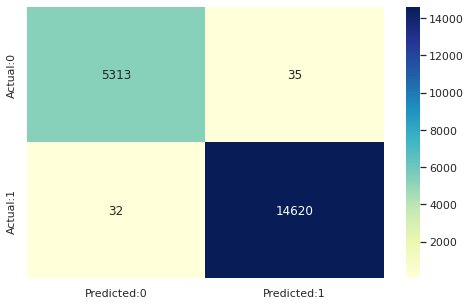

In [151]:
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

# **<a id="section-18"></a><font color='3D87A6'> ROC Curve</font>**

In [152]:
y_pred_prob = XGBClassifier.predict_proba(x_test)
y_pred_prob

array([[3.82212501e-04, 9.99617787e-01],
       [1.03721935e-01, 8.96278065e-01],
       [1.69392752e-04, 9.99830607e-01],
       ...,
       [4.80199534e-04, 9.99519800e-01],
       [4.30664919e-04, 9.99569335e-01],
       [9.99911257e-01, 8.87428069e-05]])

In [153]:
y_pred_prob = y_pred_prob[:,1]

In [154]:
roc_auc_score_test = roc_auc_score(y_test,y_pred_prob)
roc_auc_score_test

0.9998014201221008

In [155]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

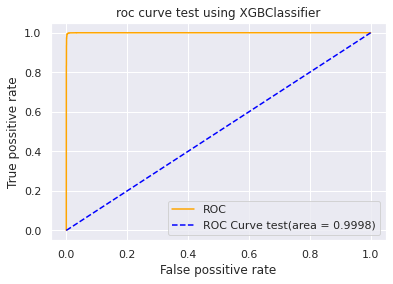

In [157]:
plt.plot(fpr,tpr,color= "orange",label = "ROC")
plt.plot([0,1],[0,1],color='blue',linestyle='--',label='ROC Curve test(area = %0.4f)' % roc_auc_score_test)
plt.xlabel('False possitive rate')
plt.ylabel('True possitive rate')
plt.title('roc curve test using XGBClassifier')
plt.legend()
plt.show()

# **<a id="section-19"></a><font color='3D87A6'> Classification Report </font>**

In [158]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5348
           1       1.00      1.00      1.00     14652

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



<img src="classification_report.png" width= "3000">

## Precision and recall tradeoff

In [161]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score

# predict probabilities
lr_Train_probs = XGBClassifier.predict_proba(x_train_oversampled)

# keep probabilities for the positive outcome only
lr_Train_probs = lr_Train_probs[:, 1]

# calculate scores
lr_train_auc = roc_auc_score(y_train_oversampled, lr_Train_probs)

# summarize scores
print('XGBClassifier: ROC AUC = %.3f' % (lr_train_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train_oversampled, lr_Train_probs)

XGBClassifier: ROC AUC = 1.000


In [162]:
fpr_tpr_df = pd.DataFrame(zip(lr_fpr, lr_tpr), columns=('FPR', 'TPR'))
fpr_tpr_df.head()

,FPR,TPR
0,0.0,0.000000
1,0.0,0.000017
2,0.0,0.000171
3,0.0,0.000205
4,0.0,0.000563


In [163]:
y_train_pred = pd.DataFrame({'Class':y_train_oversampled.values, 'Class_prob':lr_Train_probs})
y_train_pred.head()

,Class,Class_prob
0,1,0.998102
1,1,0.998293
2,1,0.914873
3,0,0.040070
4,1,0.998601


#### Observation from above Data: The 1's are assigned higher probability to the 0's. A good classification model will always try to assign higher numbers to the positive cases and assign lower numbers to negatives. 


In [164]:
y_train_pred['predicted'] = y_train_pred.Class_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred.head()

,Class,Class_prob,predicted
0,1,0.998102,1
1,1,0.998293,1
2,1,0.914873,1
3,0,0.040070,0
4,1,0.998601,1


### Is our probability threshold of 0.5 good? Finding Optimal Cutoff Point...
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [165]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(11)]
for i in numbers:
    y_train_pred[i]= y_train_pred.Class_prob.map(lambda x: 1 if x > i else 0)
y_train_pred.head()

,Class,Class_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0,1,0.998102,1,1,1,1,1,1,1,1,1,1,1,0
1,1,0.998293,1,1,1,1,1,1,1,1,1,1,1,0
2,1,0.914873,1,1,1,1,1,1,1,1,1,1,1,0
3,0,0.040070,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.998601,1,1,1,1,1,1,1,1,1,1,1,0


In [167]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

for i in numbers:
    cm1 = confusion_matrix(y_train_pred.Class, y_train_pred[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

### Plot `accuracy - sensitivity - specificity` against various probabilities.

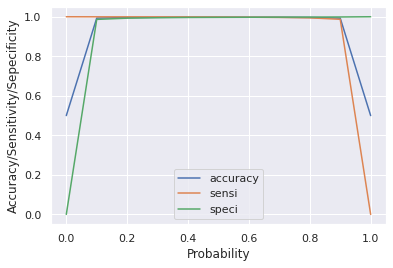

In [168]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xlabel('Probability')
plt.ylabel('Accuracy/Sensitivity/Sepecificity')
plt.show()

In [170]:
y_train_pred['final_predicted'] = y_train_pred.Class_prob.map(lambda x: 1 if x > 0.36 else 0)
y_train_pred.head()

,Class,Class_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,final_predicted
0,1,0.998102,1,1,1,1,1,1,1,1,1,1,1,0,1
1,1,0.998293,1,1,1,1,1,1,1,1,1,1,1,0,1
2,1,0.914873,1,1,1,1,1,1,1,1,1,1,1,0,1
3,0,0.040070,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0.998601,1,1,1,1,1,1,1,1,1,1,1,0,1


In [171]:
p, r, thresholds = precision_recall_curve(y_train_pred.Class, y_train_pred.Class_prob)

### Plotting the Precision-Recall Curve

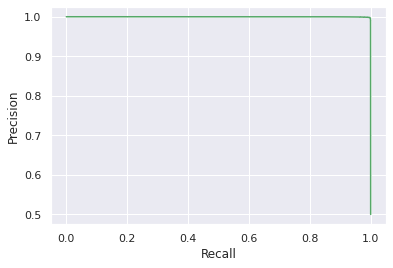

In [172]:
plt.plot(r[:-1], p[:-1], "g-")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

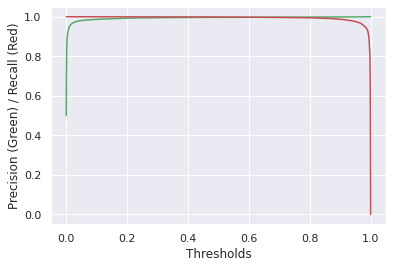

In [173]:
### Plotting Precision and Recall against Thresholds

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel('Thresholds')
plt.ylabel('Precision (Green) / Recall (Red)')
plt.show()

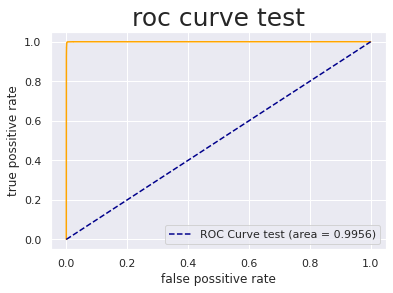

In [175]:
from sklearn.metrics import roc_auc_score

auc_test= roc_auc_score(y_test,y_test_pred)

plt.plot(lr_fpr,lr_tpr,color = 'orange')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve test (area = %0.4f)' % auc_test)
plt.xlabel('false possitive rate')
plt.ylabel('true possitive rate')
plt.title('roc curve test',fontsize=25)
plt.legend()
plt.show()

# **<a id="section-20"></a><font color='3D87A6'> Prediction </font>**

In [176]:
def main(url):
    
    status = []
    
    status.append(1)
    status.append(having_ip_address(url))
    status.append(abnormal_url(url))
    status.append(count_dot(url))
    status.append(count_www(url))
    status.append(count_atrate(url))
    status.append(no_of_dir(url))
    status.append(no_of_embed(url))
    
    status.append(shortening_service(url))
    status.append(count_https(url))
    #status.append(count_http(url))
    
    status.append(count_per(url))
    status.append(count_ques(url))
    status.append(count_hyphen(url))
    status.append(count_equal(url))
    
    status.append(url_length(url))
    status.append(hostname_length(url))
    status.append(suspicious_words(url))
    status.append(digit_count(url))
    status.append(letter_count(url))
    status.append(fd_length(url))
    tld = get_tld(url,fail_silently=True)
      
    status.append(tld_length(tld))
    
    
    

    return status

In [177]:
sm_data.head()

,const,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count%,count?,count-,count=,url_length,hostname_length,sus_url,fd_length,tld_length,count-digits,count-letters
0,1.0,0.0,0.0,0.05,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.021277,0.000000,0.006618,0.000000,0.0,0.000000,0.000000,0.000000,0.017516
1,1.0,0.0,0.0,0.05,0.00,0.0,0.111111,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.019193,0.000000,0.0,0.019011,0.000000,0.000949,0.042994
2,1.0,0.0,0.0,0.05,0.00,0.0,0.166667,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.016545,0.000000,0.0,0.026616,0.000000,0.000949,0.036624
3,1.0,0.0,1.0,0.10,0.25,0.0,0.055556,0.0,0.0,0.0,0.0,0.071429,0.021277,0.181818,0.054269,0.088983,0.0,0.034221,0.107143,0.006641,0.097134
4,1.0,0.0,1.0,0.05,0.00,0.0,0.055556,0.0,0.0,0.0,0.0,0.071429,0.021277,0.136364,0.151555,0.097458,0.0,0.034221,0.142857,0.020873,0.313694


In [178]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    # Due to updates to scikit-learn, we now need a 2D array as a parameter to the predict function.
    features_test = np.array(features_test).reshape((1, -1))

    

    pred = XGBClassifier.predict(features_test)
    if int(pred[0]) == 0:
        
        res="SAFE"
        return res
    else:
        res="PHISHING"
        return res
    

In [179]:
urls = ['titaniumcorporate.co.za','en.wikipedia.org/wiki/North_Dakota',"http://adventure-nicaragua.net/index.php?option=com_mailto&tmpl=component&link=aHR0cDovL2FkdmVudHVyZS1uaWNhcmFndWEubmV0L2luZGV4LnBocD9vcHRpb249Y29tX2NvbnRlbnQmdmlldz1hcnRpY2xlJmlkPTQ3OmFib3V0JmNhdGlkPTM2OmRlbW8tYXJ0aWNsZXMmSXRlbWlkPTU0","yourbittorrent.com/?q=anthony-hamilton-soulife","http://www.szabadmunkaero.hu/cimoldal.html?start=12","http://www.szabadmunkaero.hu/cimoldal.html?start=12"]
for url in urls:
     print(get_prediction_from_url(url))


SAFE
PHISHING
SAFE
PHISHING
SAFE
SAFE
